# Numerical Integration Precision

This was an experiment and is not part of the paper.

We observe the limits of the trapezoidal rule for numerical integration. First, we'll start with some imports and definitions:

In [1]:
import numpy as np
from pathlib import Path
from gravann.functions import error_calculation
import pandas as pd
import seaborn as sns
from tqdm import tqdm

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2


input_directory_polyhedral = Path("F:/results/cg/polyhedral-total-seed-3/churyumov-gerasimenko/polyhedral/it-id-0000")
input_directory_mascon = Path("F:/results/cg/polyhedral-total-seed-3/churyumov-gerasimenko/mascon/it-id-0018")
max_exp = 21
n_integration = np.logspace(2, max_exp, num=max_exp - 1, base=2)

We then compute the relative error for different step-sizes when comparing the integral to the analytical solution.

In [4]:
max_bound = 2.0
print(f"Polyhedral Model with max_bound={max_bound}")
print(error_calculation.error_calculation(input_directory_polyhedral, n_integration, max_bound))
print(f"Mascon Model with max_bound={max_bound}")
print(error_calculation.error_calculation(input_directory_mascon, n_integration, max_bound))

Polyhedral Model with max_bound=2.0
[1.000977635383606, 1.000977635383606, 0.9260651469230652, 0.9260651469230652, 1.0402570962905884, 0.25204235315322876, 0.11263398826122284, 0.09669473022222519, 0.019722064957022667, 0.03310984745621681, 0.0173189677298069, 0.017433326691389084, 0.009105526842176914, 0.008555843494832516, 0.009393975138664246, 0.01032522413879633, 0.009514236822724342]
None
Mascon Model with max_bound=2.0
[1.0007591247558594, 1.0007591247558594, 1.649813175201416, 1.649813175201416, 8.26657485961914, 2.151057243347168, 1.4949026107788086, 0.49322524666786194, 0.2248481810092926, 0.7039282917976379, 0.49001047015190125, 0.20231002569198608, 0.09502996504306793, 0.10354224592447281, 0.07928629219532013, 0.08355464786291122, 0.08783616125583649]
None


In [5]:
max_bound = 1.0
print(f"Polyhedral Model with max_bound={max_bound}")
print(error_calculation.error_calculation(input_directory_polyhedral, n_integration, max_bound))
print(f"Mascon Model with max_bound={max_bound}")
print(error_calculation.error_calculation(input_directory_mascon, n_integration, max_bound))

Polyhedral Model with max_bound=1.0
[0.9987804889678955, 0.9987804889678955, 7.397008419036865, 7.397008419036865, 4.87523078918457, 4.840843677520752, 1.0168821811676025, 0.6551875472068787, 0.3890206813812256, 0.21436166763305664, 0.24237596988677979, 0.14483220875263214, 0.0306258387863636, 0.049448467791080475, 0.043460458517074585, 0.03612111881375313, 0.03315385431051254]
None
Mascon Model with max_bound=1.0
[0.9999669194221497, 0.9999669194221497, 1.5939613580703735, 1.5939613580703735, 2.3307559490203857, 0.8276010155677795, 0.48942118883132935, 0.43457406759262085, 0.1900831162929535, 0.12205377966165543, 0.10335052758455276, 0.08221351355314255, 0.0835912823677063, 0.07633327692747116, 0.07469092309474945, 0.07765748351812363, 0.07685858756303787]
None


In [6]:
max_bound = 0.5
print(f"Polyhedral Model with max_bound={max_bound}")
print(error_calculation.error_calculation(input_directory_polyhedral, n_integration, max_bound))
print(f"Mascon Model with max_bound={max_bound}")
print(error_calculation.error_calculation(input_directory_mascon, n_integration, max_bound))

Polyhedral Model with max_bound=0.5
[1.0000308752059937, 1.0000308752059937, 20.959867477416992, 20.959867477416992, 3.089304208755493, 7.0330810546875, 1.252335548400879, 0.9352840185165405, 0.47974660992622375, 0.34772905707359314, 0.20844830572605133, 0.14067378640174866, 0.04759502038359642, 0.0344189815223217, 0.034704193472862244, 0.03088027983903885, 0.027411585673689842]
None
Mascon Model with max_bound=0.5
[0.9999152421951294, 0.9999152421951294, 13.388066291809082, 13.388066291809082, 3.279863119125366, 2.8913626670837402, 0.8701159954071045, 0.9166197776794434, 0.3889414668083191, 0.30115631222724915, 0.1857193559408188, 0.14160317182540894, 0.10888990759849548, 0.07756892591714859, 0.08009471744298935, 0.07762687653303146, 0.08013113588094711]
None


In [20]:
df = pd.DataFrame()
max_bound = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0]
print("Polyhedral Model")
for bound in tqdm(max_bound):
    error = error_calculation.error_calculation(input_directory_polyhedral, n_integration, bound)
    df = df.append({"model": "polyhedral", "max_bound": bound, **error}, ignore_index=True)
print("Mascon Model")
for bound in tqdm(max_bound):
    error = error_calculation.error_calculation(input_directory_mascon, n_integration, bound)
    df = df.append({"model": "mascon", "max_bound": bound, **error}, ignore_index=True)
df.to_csv("error3.csv")

Polyhedral Model


100%|██████████| 10/10 [00:00<00:00, 9333.12it/s]


Mascon Model


  0%|          | 0/10 [00:15<?, ?it/s]


KeyboardInterrupt: 

In [13]:
df

,model,max_bound,4.0,8.0,16.0,32.0,64.0,128.0,256.0,512.0,...,4096.0,8192.0,16384.0,32768.0,65536.0,131072.0,262144.0,524288.0,1048576.0,2097152.0
0,polyhedral,0.001,1.000005,1.000005,1.437036,1.437036,1.343970,1.013885,1.028354,1.294569,...,0.869459,1.020076,0.796389,1.029132,0.780713,0.795423,0.764365,0.755340,0.769614,0.757690
1,polyhedral,0.005,1.000018,1.000018,1.799130,1.799130,2.489773,1.983220,1.133575,1.061176,...,0.911818,0.819475,0.777270,0.786640,0.758439,0.754058,0.747525,0.751853,0.752869,0.754444
2,polyhedral,0.010,1.000018,1.000018,1.328953,1.328953,1.881548,1.437285,1.445484,1.061774,...,0.998602,0.779953,0.893437,0.818683,0.832669,0.762238,0.769917,0.758290,0.760805,0.763668
3,polyhedral,0.050,1.000001,1.000001,2.285584,2.285584,1.224689,1.352408,0.982240,0.851720,...,0.762533,0.747945,0.759674,0.762224,0.753319,0.754932,0.754359,0.754198,0.754428,0.754640
4,polyhedral,0.100,1.000122,1.000122,2.494527,2.494527,13.071548,2.315161,1.392141,1.092220,...,0.795521,0.774770,0.798341,0.752172,0.762179,0.782413,0.785824,0.765613,0.764369,0.764108
5,polyhedral,0.500,1.000097,1.000097,0.582441,0.582441,1.210380,0.753676,0.742962,0.794436,...,0.754488,0.753598,0.756661,0.755459,0.754454,0.754727,0.755465,0.754685,0.754771,0.754845
6,polyhedral,1.000,1.000295,1.000295,0.556934,0.556934,0.838874,0.748018,0.733292,0.769946,...,0.751783,0.753568,0.755438,0.753915,0.753506,0.754047,0.754509,0.754337,0.754429,0.754469
7,polyhedral,5.000,0.999387,0.999387,0.558027,0.558027,0.842438,0.749031,0.733729,0.771707,...,0.752219,0.753508,0.755524,0.754027,0.753489,0.753967,0.754466,0.754289,0.754378,0.754420
8,polyhedral,10.000,0.999385,0.999385,0.557306,0.557306,0.834390,0.743963,0.733363,0.772346,...,0.752559,0.753404,0.755407,0.754155,0.753556,0.753927,0.754428,0.754285,0.754355,0.754395
9,polyhedral,50.000,0.999397,0.999397,0.557316,0.557316,0.861492,0.740929,0.734599,0.773203,...,0.752184,0.753385,0.755580,0.754122,0.753509,0.753968,0.754507,0.754298,0.754383,0.754419


In [14]:
dfm = df.melt(["model", "max_bound"], var_name="n_integration", value_name="relative_error")
dfm

,model,max_bound,n_integration,relative_error
0,polyhedral,0.001,4.0,1.000005
1,polyhedral,0.005,4.0,1.000018
2,polyhedral,0.010,4.0,1.000018
3,polyhedral,0.050,4.0,1.000001
4,polyhedral,0.100,4.0,1.000122
...,...,...,...,...
395,mascon,0.500,2097152.0,0.771991
396,mascon,1.000,2097152.0,0.771915
397,mascon,5.000,2097152.0,0.771859
398,mascon,10.000,2097152.0,0.771841


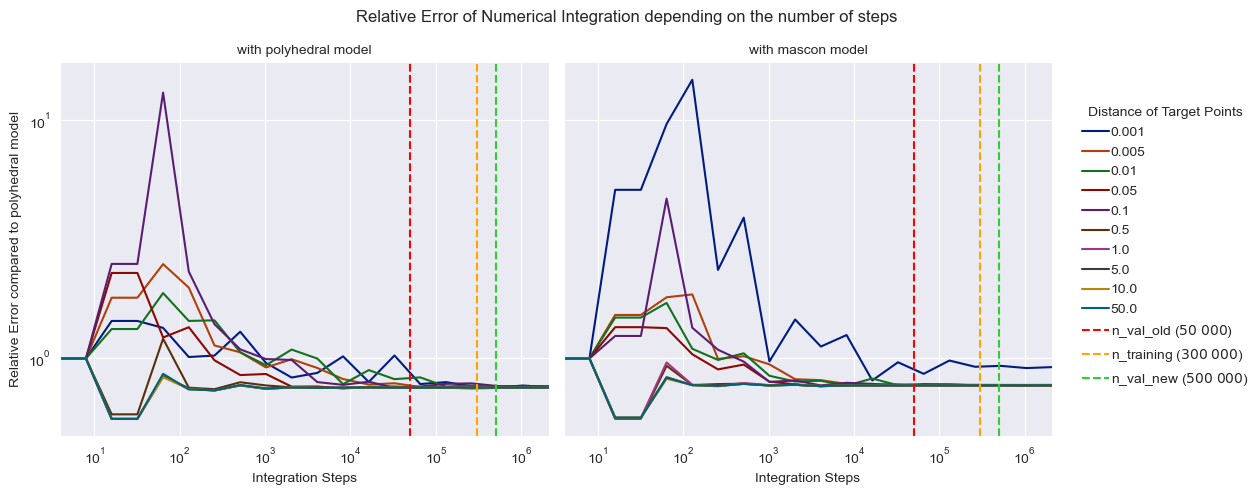

In [17]:
g = sns.relplot(
    data=dfm, kind="line",
    x="n_integration", y="relative_error", col="model",
    hue="max_bound", palette='dark'
)
g.set(xlim=(4.0, 2097152.0), xscale='log', yscale='log', xlabel="Integration Steps", ylabel="Relative Error compared to polyhedral model")
g.set_titles("with {col_name} model")
g.fig.suptitle("Relative Error of Numerical Integration depending on the number of steps")
g.map(plt.axvline, x=50000, ls='--', c='red', label="n_val_old ($50\;000$)")
g.map(plt.axvline, x=300000, ls='--', c='orange', label="n_training ($300\;000$)")
g.map(plt.axvline, x=500000, ls='--', c='limegreen', label="n_val_new ($500\;000$)")
g.legend.remove()
g.add_legend(handletextpad=0.1, title="Distance of Target Points")
g.tight_layout()
g.savefig("error3.png", dpi=300)